<a href="https://colab.research.google.com/github/yje0515/PythonStudy2025/blob/main/06_01_%EA%B5%B0%EC%A7%91%EB%B9%84%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 비지도학습 : 타겟이 없는 데이터를 사용하는 것
# 딥러닝 : 정답을 알려주지 않아도 스스로 판단함

In [2]:
# MBC 마켓에서 이벤트를 진행하기로 하였다.
# 본인이 구매한 과일 사진을 홈페이지에 업로드하면 추첨을 하여 상품을 제공하려함

# 고객이 올린 사진을 학습하여 과일을 분류해본다.
# 비지도학습 : Unsupervised Learning
# 사람이 가르쳐주지 않아도 데이터에 있는 무언가를 학습함

# 비법 : 사진의 픽셀값을 모두 평균내면 비슷한 과일끼리 모일까?
# 과일사진 300개를 준비하여 분류를 해보자.

!wget https://bit.ly/fruits_300_data -O fruits_300.npy
# 과일사진 데이터 준비(캐글에 공개된 데이터셋 ) - 대문자 O

--2025-11-11 05:22:09--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2025-11-11 05:22:09--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2025-11-11 05:22:10--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [5]:
import numpy as np
import matplotlib.pyplot as plt

fruits = np.load('fruits_300.npy') # 저장된 파일을 불러와 배열로 처리
# 넘파이배열
# fruits_300.npy 파일에 들어있는 모든 데이터를 담는다

In [6]:
print(fruits.shape)
# 샘플개수, 이미지높이, 이미지너비 -> 과일사진300장, 해상도 100X100
# https://www.kaggle.com/ 캐글에가면 데이터셋이 많음

(300, 100, 100)


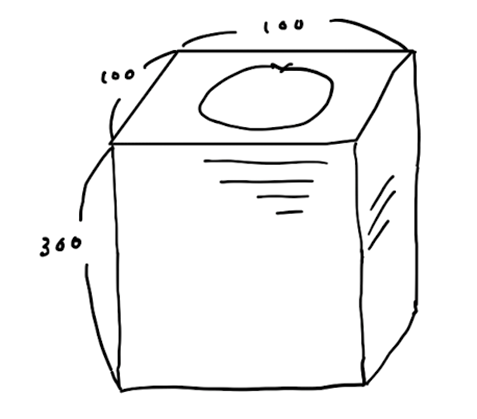

In [7]:
print(fruits[0,0,:]) # 3 차원 배열의 0번행 0번열 모든 값

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


In [8]:
print(fruits[0,50,:])

[  5   1   1   3   2  45  84  78  76  74  76  75  74  75  72  67  65  65
  64  63  62  60  59  62  58  55  54  54  53  52  50  49  51  52  53  53
  54  56  59  62  65  67  71  74  76  79  83  86  90  94  97  99 102 105
 108 112 115 120 124 127 133 138 143 149 155 156 157 162 170 174 175 176
 181 187 194 201 204 206 210 216 222 225 228 232 234 236 237 237 237 235
 237 238 234 229 114   1   1   1   1   1]


In [9]:
print(fruits[0,99,:])

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   3   6
   4   1   1   1   1   2   1   1   1   2   3   2  81 141 172 175 146 118
 127 153 180 236  65   2   4   1   4   5   6   4   1   6   1   1   6   1
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


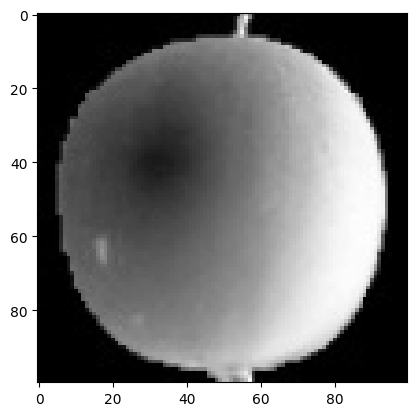

In [14]:
plt.imshow(fruits[0],cmap='gray')
plt.show() # 넘파이에서는 흑백사진을 반전시켜보여준다.

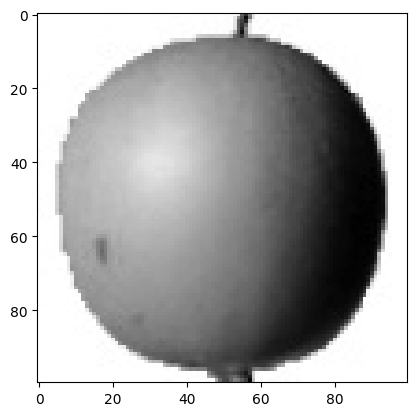

In [15]:
plt.imshow(fruits[0], cmap='gray_r') # 반전의 반전
plt.show()

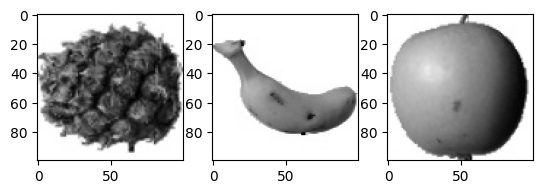

In [18]:
fig, axs = plt.subplots(1,3)
# maplotlib의 함수, 여러개의 그래프를 배열처럼 쌓을 수 있도록 도와줌
# 하나의 행과 3개의 열 -> 반환되는 axs는 3개의 서브그래프를 담고있는 배열임
axs[0].imshow(fruits[130],cmap='gray_r')
axs[1].imshow(fruits[230],cmap='gray_r')
axs[2].imshow(fruits[30],cmap='gray_r')
plt.show()
# 파인애플, 바나나, 사과

In [22]:
# 픽셀값 분석하기 위해 넘파이 배열을 나눌때 100X100 이미지를 펼쳐서 10,000인 1차원 배열로 만듦

apple = fruits[0:100].reshape(-1,100*100)
pineapple = fruits[100:200].reshape(-1,100*100)
banana = fruits[200:300].reshape(-1,100*100)

# fruits 배열에서 순서대로 100개씩 선택하기 위해 슬라이싱 연산자를 활용
#reshape() 메서드로 두번째 차원(가로)100, 세번째 차원(세로) 100을 곱해 10,000개를 만듦
# reshape(-1,)로 지정하면 자동으로 남은 객체를 할당한다. (첫번째 차원이 샘플 갯수)
print(apple.shape) # 100개의 객체, 10000개의 값
print(pineapple.shape) # 파인애플 100개의 자료
print(banana.shape) # 바나나 100개의 자료

(100, 10000)
(100, 10000)
(100, 10000)


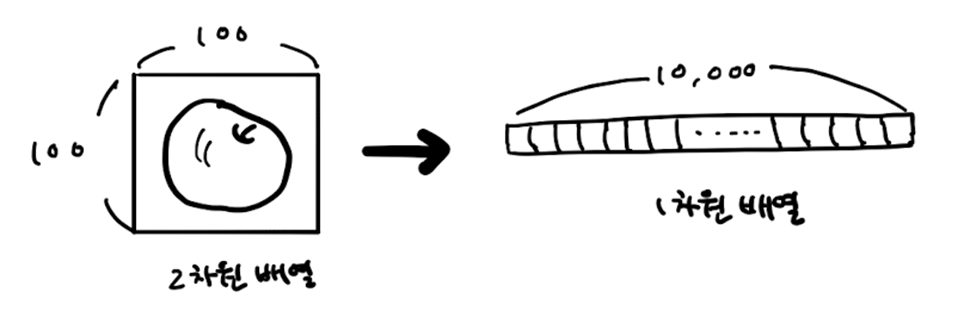

In [29]:
# mean() 평균 구하는 함수
# axis 중심선(배열의 축) axis = 0 행을 따라 계산, axis=1은 열을 따라 계산
# 우리가 필요한 것은 샘플의 평균값 (샘플을 모두 가로로 값을 나열했으니 axis=1)
print(apple.mean(axis=1))
# 8 * 12 + 4 = 100개 -> 사과 하나하나에 대한 픽셀의 평균
print("-"*80)
print(pineapple.mean(axis=1))
print("-"*80)
print(banana.mean(axis=1))

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]
--------------------------------------------------------------------------------
[ 99.

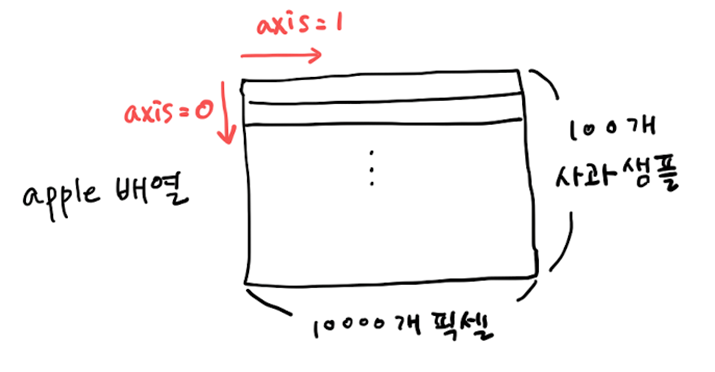

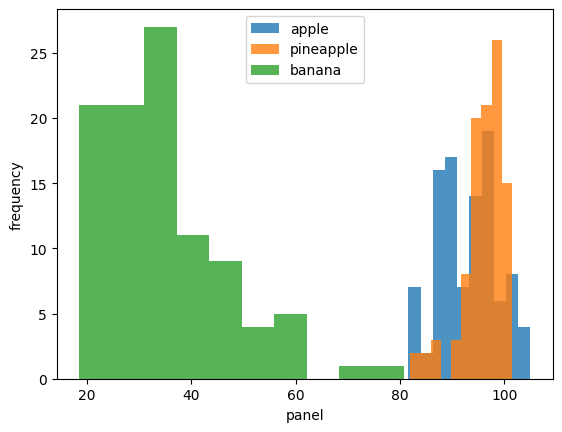

In [30]:
# 히스토그램 : 값이 발생한 빈도를 그래프로 표시함
# x축 : 값의 구간(계급) , y축 : 발생빈도(도수) (막대그래프)
plt.hist(np.mean(apple,axis=1),alpha=0.8) # alpha(1:불투명)
plt.hist(np.mean(pineapple,axis=1),alpha=0.8)
plt.hist(np.mean(banana,axis=1),alpha=0.8)
plt.legend(['apple','pineapple','banana']) # 범례(순서대로)
plt.xlabel('panel') # 구간
plt.ylabel('frequency') # 빈도
plt.show()
# 바나나는 길고 사과나 파인애플은 둥글기에 평균값이 차이남
# 바나나 사진은 평균이 40점에 집중되어있고 사과와 파인애플은 90~100 사이에 많이 있다.
# 바나나가 길어서 공간이 많음, 사과와 파인애플은 둥글기 때문에 공간이 많이 없다

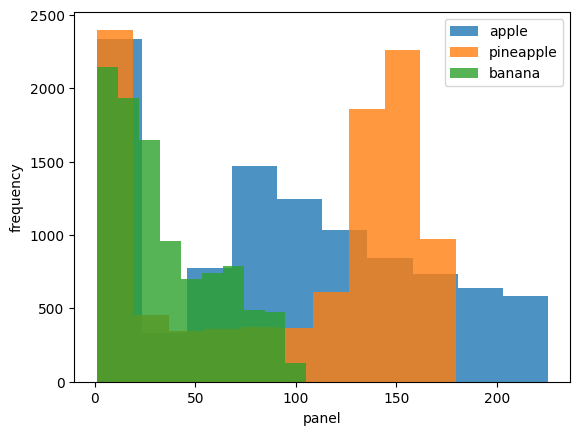

In [31]:
# 개선해보기 위해서 axis=0으로 변경해보면 어떨까?
plt.hist(np.mean(apple, axis=0), alpha=0.8) # alpha=1이면 불투명, 낮으면 투명도
plt.hist(np.mean(pineapple, axis=0), alpha=0.8)
plt.hist(np.mean(banana, axis=0), alpha=0.8)
plt.legend(['apple', 'pineapple', 'banana']) # 범례(순서대로)
plt.xlabel('panel') # 구간
plt.ylabel('frequency') # 빈도
plt.show()
# 결론 세로 픽셀로 평균을 구했더니 더 엉망인 데이터가 나왔다.

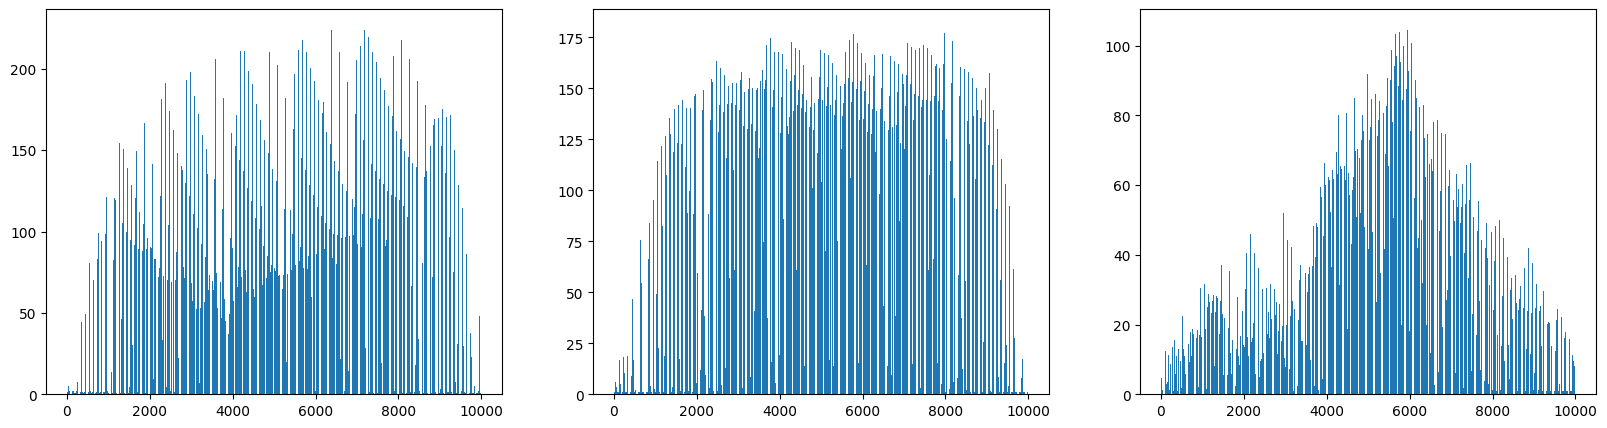

In [33]:
# 샘플의 평균값이 아니라 픽셀별 평균값을 비교해보자! ( 픽셀값이 높은 위치가 조금 다름 )
fig, axs = plt.subplots(1,3,figsize=(20,5))
axs[0].bar(range(10000), np.mean(apple, axis=0))
axs[1].bar(range(10000), np.mean(pineapple, axis=0))
axs[2].bar(range(10000), np.mean(banana, axis=0))
plt.show()
# 세로 슬라이스 모양과 유사
#         사과                           파인애플                            바나나

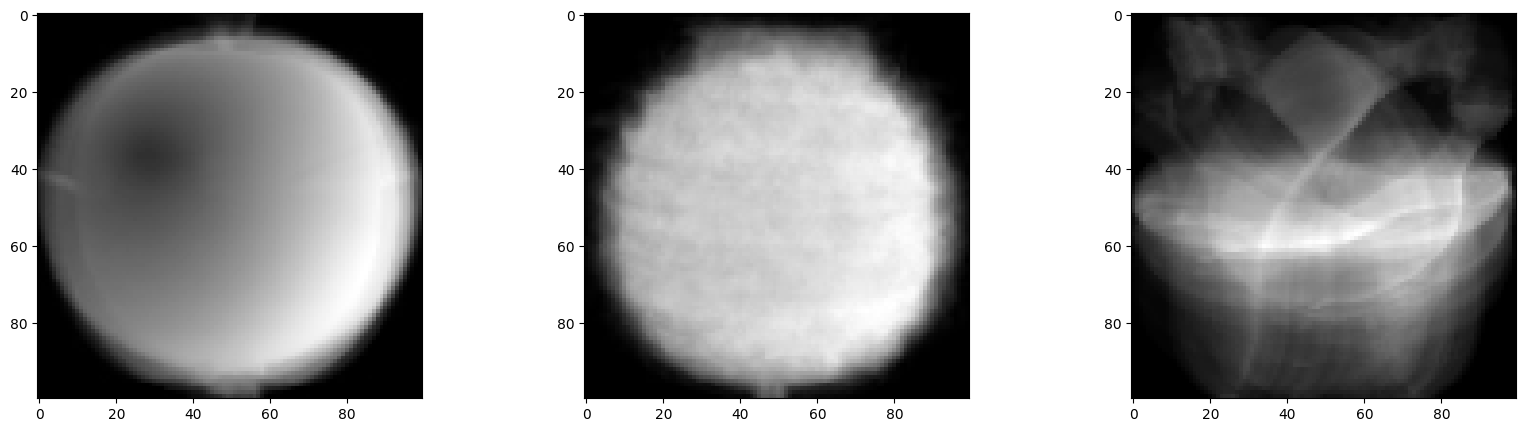

In [34]:
# 결론
# 픽셀의 평균으로는 특징을 찾기 힘들다.
# 픽셀을 다 모아 평균을 내고 이미지로 출력해보자.

# 픽셀의 평균값을 100*100으로 바꾸고 이미지처럼 출력
apple_mean = np.mean(apple,axis=0).reshape(100,100) # axis=0 : 행
pineapple_mean = np.mean(pineapple,axis=0).reshape(100,100) # axis=0 : 행
banana_mean = np.mean(banana,axis=0).reshape(100,100) # axis=0 : 행

fig,axs = plt.subplots(1,3,figsize=(20,5))
axs[0].imshow(apple_mean,cmap='gray')
axs[1].imshow(pineapple_mean,cmap='gray')
axs[2].imshow(banana_mean,cmap='gray')
plt.show()
#       사과                              파인애플                             바나나

In [35]:
# 100개씩 평균낸 값과 300개 중 가까운 사진 고르기
abs_diff = np.abs(fruits - apple_mean) # abs(300개의 원본사진 - 사과의 평균)
# apple_mean과 가장 가까운 사진을 고르기 위해서 절대값 오차를 사용해보겠다.
# 넘파이 abs는 절대값을 계산하는 함수임

abs_mean = np.mean(abs_diff, axis=(1,2))
# 배열에 사용하면 모든 원소의 절대값을 계산하여 입력과 동일한 크기의 배열을 반환
# np.abs와 absolute()는 유사함

# abs_diff는 300,100,100 크기의 배열
#  axis(0, 1, 2)
# 각 샘플에 대한 평균을 구하기 위해 axis에 두번째ㅡ 세번째 차원을 모두 지정함
print(abs_mean.shape)
# 이렇게 계산한 abs_mean은 각 샘플의 오차 평균임 -> 크기(300,)인 1차원 배열

(300,)


In [36]:
print(abs_mean)
# 300개의 과일에서 100개의 사과 평균을 뺀 값
# -> 오름차순 정렬하면 가장 사과에 가까운게 나오나?

[17.37576  13.508874 17.183394 15.68311  17.983306 20.565392 16.795812
 16.144276 19.611994 21.32059  16.454222 16.590134 13.37039  17.23263
 15.92806  15.496638 18.582212 16.48196  27.651556 19.7871   20.826912
 16.417934 17.059946 15.904296 15.086176 19.371364 24.076362 14.777732
 19.20517  20.805182 14.797906 18.658418 15.973216 13.04259  18.381052
 16.59904  16.288504 18.960586 13.88574  16.497594 18.40376  19.174642
 29.096702 18.40849  28.223962 21.42994  19.740466 15.590532 13.082678
 18.765996 14.391198 21.464746 26.261028 15.887148 18.568706 16.410426
 17.108034 13.178824 18.199846 13.503056 20.845032 16.898184 22.81774
 18.99896  19.102706 16.636216 14.845644 19.357872 14.778086 14.468082
 13.085526 15.946606 20.42774  16.241996 13.720382 18.416166 15.229106
 16.411342 13.47148  20.050622 17.296816 21.071312 18.451708 19.645494
 15.585712 20.582004 13.850318 13.269222 21.875262 17.152098 15.60477
 23.890138 14.442124 18.794826 15.750524 16.58135  19.375552 17.802096
 15.47841

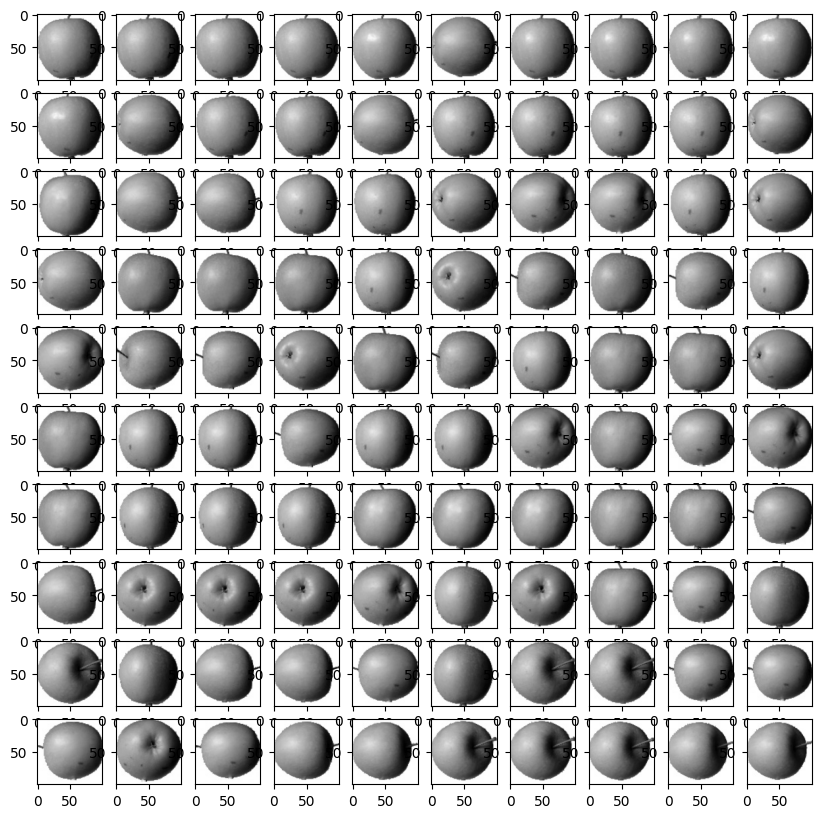

In [37]:
# 이 값이 가장 작은 순서대로 100개를 골라보자
# -> apple_mean과 가장 오차가 작은 샘플 100개
#p.argsort()함수는 오름차순으로 나열한 abs_mean 배열의 인덱스를 반환
# 이 인덱스 중에서 처음 100개를 선택해 10*10 그래프를 그려봄
apple_index = np.argsort(abs_mean)[:100]
fig,axs = plt.subplots(10,10,figsize=(10,10))
# 10,10개(100개)의 서브그래프 (10,10)의 크기
# figsize(8,6)이 기본값

# for문
for i in range(10):
    for j in range(10):
        axs[i,j].imshow(fruits[apple_index[i*10+j]],cmap='gray_r')
# axs는 (10,10) 크기의 2차원 배열이므로 i,j 두 첨자를 사용해 서브 그래프 위치를 지정
#axs[i,j].axis('off') # 깔끔한 이미지만 그리기 위해 axis off (축 표시 끔)

plt.show()

In [ ]:
# 지금까지 흑백사진을 이용해 픽셀값을 사용하고 과일 사진을 모으는 작업을 진행함
# 이렇게 비슷한 샘플끼리 그룹으로 모으는 작업을 클러스터링(군집)이라고 함
# 군집 알고리즘에서 만든 그룹을 클러스터라고 부름

# 지금까지는 사과, 파인애플,바나나가 있다는 것을 알고있었음으로 타깃 값을 미리 알고 접근함
# 실제 비지도 학습에서는 타깃값을 모르는 것이 대부분 -> 샘플 평균 값을 미리 구할 수 없음

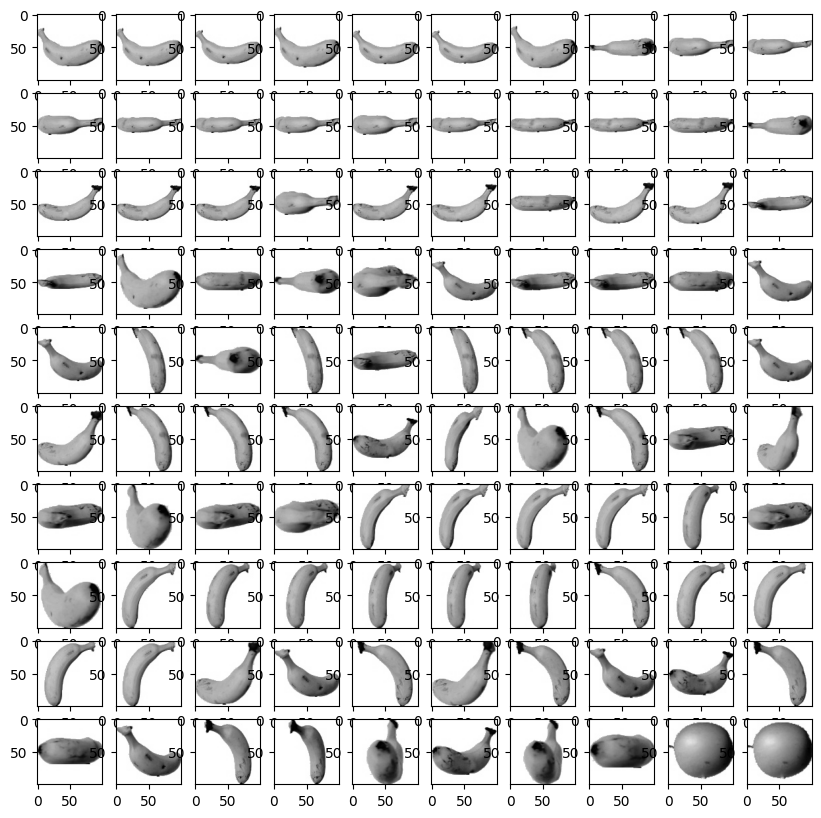

In [40]:
# 바나나를 찾아보자
abs_diff = np.abs(fruits-banana_mean) # (300개의 원본사진 - 바나나의 평균)
abs_mean = np.mean(abs_diff,axis=(1,2))
banana_index = np.argsort(abs_mean)[:100]
fig,axs = plt.subplots(10,10,figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i,j].imshow(fruits[banana_index[i*10+j]],cmap='gray_r')
plt.show()

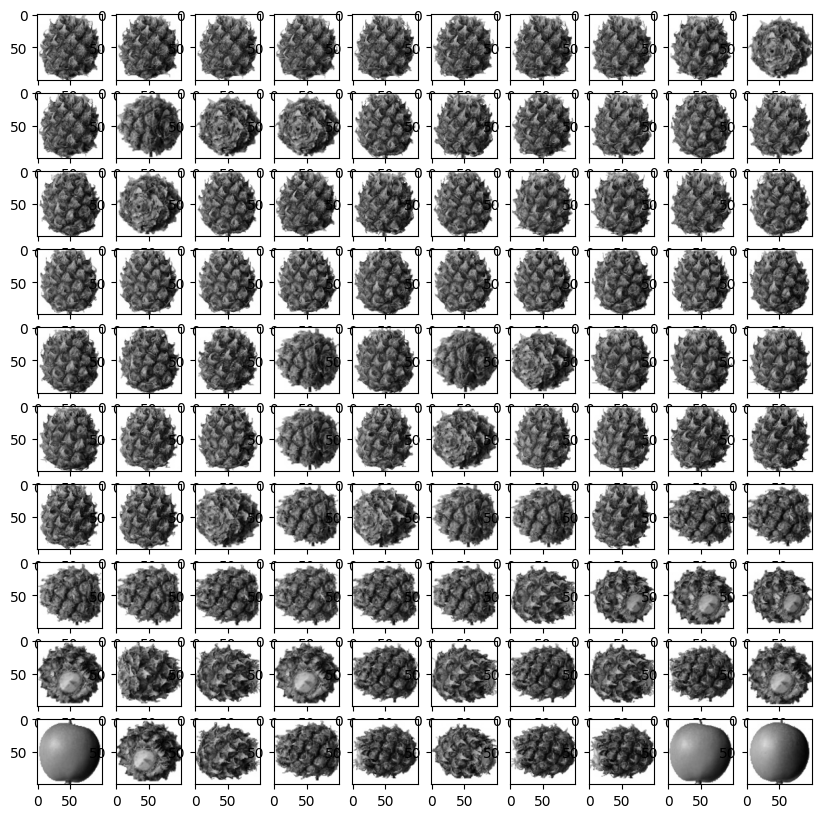

In [41]:
# 파인애플을 찾아보자
abs_diff = np.abs(fruits-pineapple_mean) # (300개의 원본사진 - 파인애플의 평균)
abs_mean = np.mean(abs_diff,axis=(1,2))
pineapple_index = np.argsort(abs_mean)[:100]
fig,axs = plt.subplots(10,10,figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i,j].imshow(fruits[pineapple_index[i*10+j]],cmap='gray_r')
plt.show()